In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
import pandas as pd
import statsmodels.stats.diagnostic as sm

In [27]:
dados = sc.loadmat('simcosta_SP1_2048.mat')
S = dados['S']
T = dados['T']
DO = dados['DO']
CDOM = dados['CDOM']
t = dados['t']
turb = dados['Turb']
chla = dados['chla']
plt.style.use('ggplot')


In [28]:
Si = S[0,:]
Si = pd.Series(Si).interpolate().values

Ti = T[0,:]
Ti = pd.Series(Ti).interpolate().values

DOi = DO[0,:]
DOi = pd.Series(DOi).interpolate().values

CDOMi = CDOM[0,:]
CDOMi = pd.Series(CDOMi).interpolate().values

turbi = turb[0,:]
turbi = pd.Series(turbi).interpolate().values

chlai = chla[0,:]
chlai = pd.Series(chlai).interpolate().values


In [29]:
tempo = np.zeros_like(Si)
for i in range(2048):
   tempo[i] = tempo[i]+i

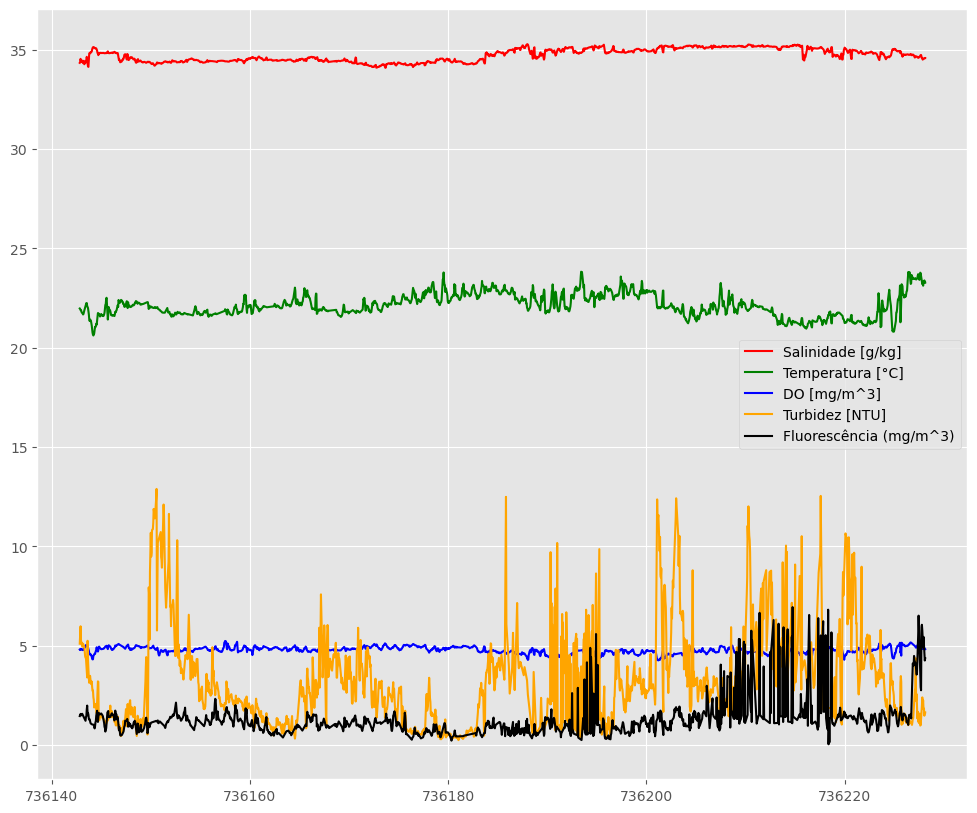

In [30]:
plt.figure(figsize=(12,10))
a1=plt.plot(t[0,:],Si,'r',label='Salinidade [g/kg]')
a2=plt.plot(t[0,:],Ti,'g',label='Temperatura [°C]')
a3=plt.plot(t[0,:],DOi,'b',label='DO [mg/m^3]')
a4=plt.plot(t[0,:],turbi,'orange',label='Turbidez [NTU]')
a5=plt.plot(t[0,:],chlai,'k',label='Fluorescência (mg/m^3)')
plt.legend()


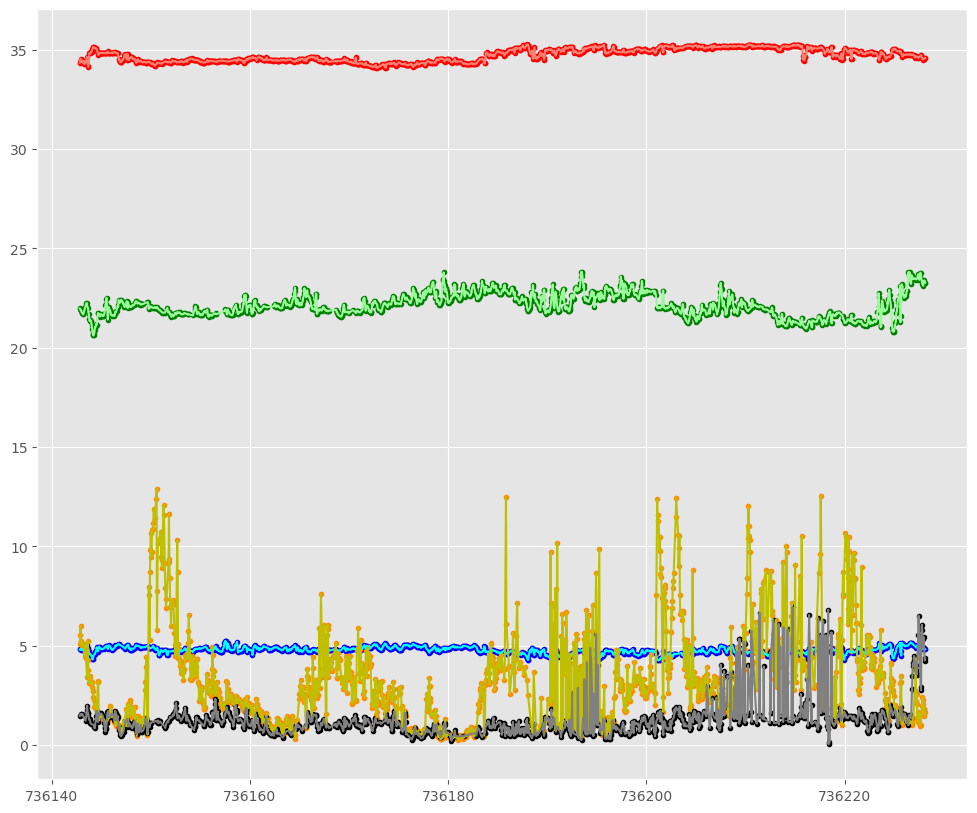

In [31]:
plt.figure(figsize=(12,10))
plt.plot(t,S,'r.',label='Salinidade [g/kg]')
plt.plot(t,T,'g.',label='Temperatura [°C]')
plt.plot(t,DO,'b.',label='DO [mg/m^3]')
plt.plot(t,turb,'.',label='Turbidez [NTU]',color='darkorange')
plt.plot(t,chla,'k.',label='Fluorescência (mg/m^3)')

a1=plt.plot(t[0,:],Si,'salmon',label='Salinidade [g/kg]')
a2=plt.plot(t[0,:],Ti,'palegreen',label='Temperatura [°C]')
a3=plt.plot(t[0,:],DOi,'cyan',label='DO [mg/m^3]')
a4=plt.plot(t[0,:],turbi,'y',label='Turbidez [NTU]')
a5=plt.plot(t[0,:],chlai,'gray',label='Fluorescência (mg/m^3)')



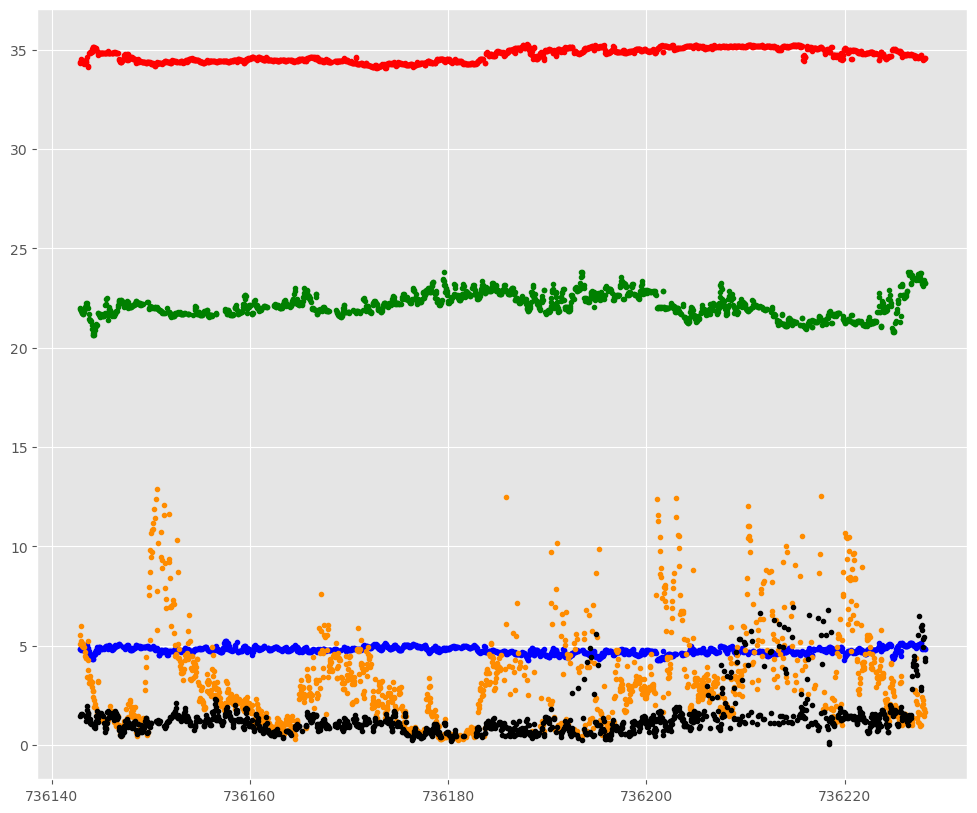

In [32]:
plt.figure(figsize=(12,10))
plt.plot(t,S,'r.',label='Salinidade [g/kg]');
plt.plot(t,T,'g.',label='Temperatura [°C]');
plt.plot(t,DO,'b.',label='DO [mg/m^3]');
plt.plot(t,turb,'.',label='Turbidez [NTU]',color='darkorange');
plt.plot(t,chla,'k.',label='Fluorescência (mg/m^3)');



In [33]:
Sp= pd.Series(Si)

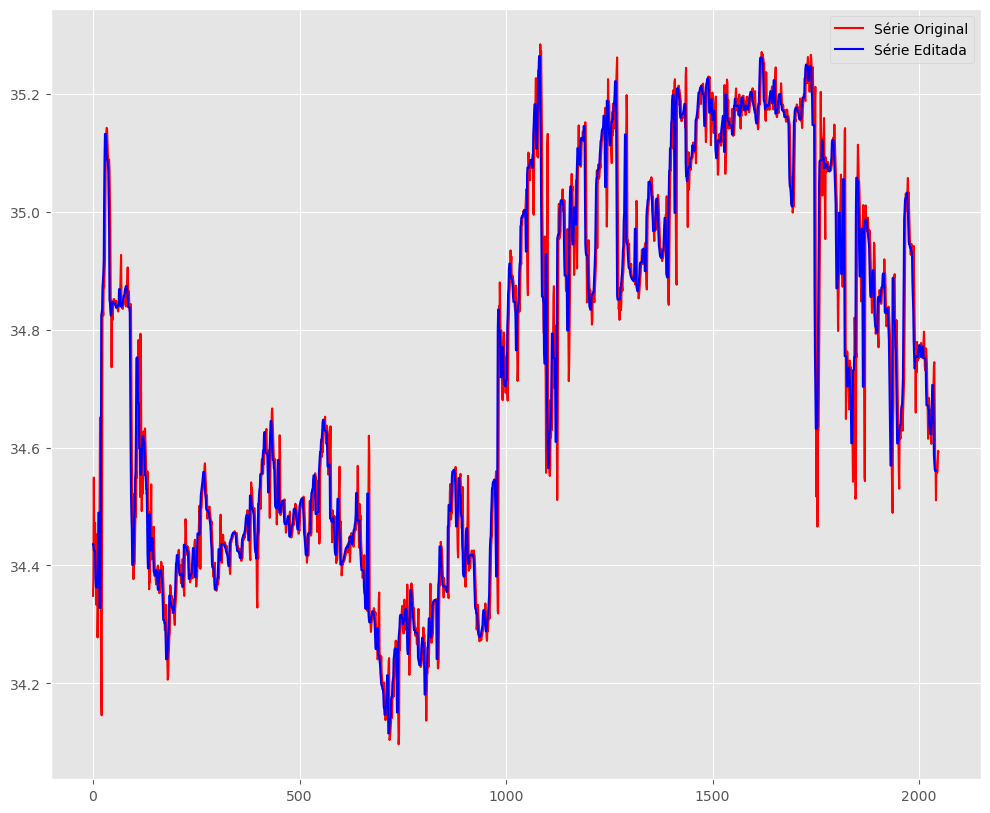

In [34]:
plt.figure(figsize=(12,10))
desvio_padrao = Sp.std()
jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
meio = [sorted(janela)[2] for janela in jan5]
jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
meio2 = [sorted(janela)[1] for janela in jan3]
meio2 =np.array(meio2)
#plt.subplot(221)
plt.plot(Sp.values,'r-', label='Série Original')
#plt.legend()

#plt.subplot(222)

plt.plot(meio2,'b-' ,label='Série Editada')
plt.legend()


In [35]:
Diferen = np.abs(Sp.values[0:2042] - meio2)
III = np.where(Diferen > 3*desvio_padrao)[0]
X = meio2.copy()
X[III] = Sp[III]

In [36]:
def wildedit(X,const=3):
    Sp = pd.Series(X)
    desvio_padrao = Sp.std()
    jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
    meio = [sorted(janela)[2] for janela in jan5]
    jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
    meio2 = [sorted(janela)[1] for janela in jan3]
    meio2 =np.array(meio2 )
    Diferen = np.abs(Sp.values - meio2)
    III = np.where(Diferen > 3*desvio_padrao)[0]
    X = meio2.copy()
    X[III] = Sp[III]
    return(X)

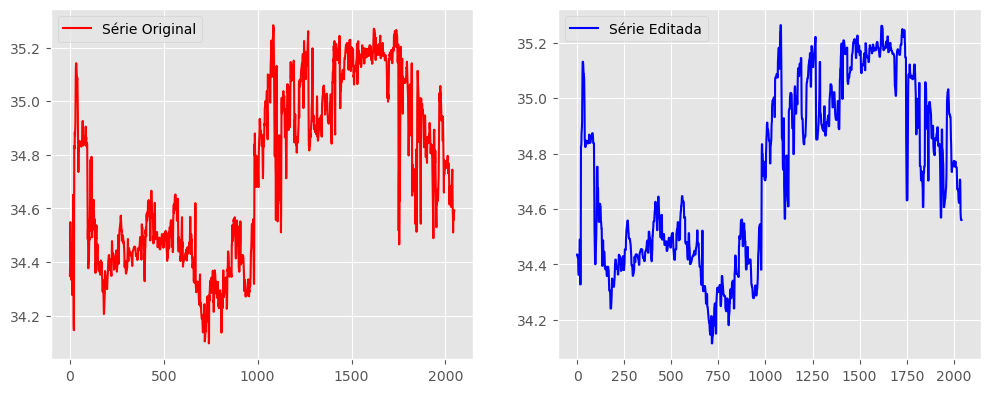

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(Sp.values,'r-', label='Série Original')
plt.legend()

plt.subplot(222)

plt.plot(X,'b-' ,label='Série Editada')
plt.legend()


In [38]:
x1 = np.random.uniform(size=1000)
x2 = np.random.normal(size=1000)
print(np.mean(x1))
print(np.mean(x2))
print(np.std(x1))
print(np.std(x2))

0.5154893525601721
0.03452950605871473
0.29331195672413474
0.9876328513288959


Text(0.5, 0, 'Uniforme')

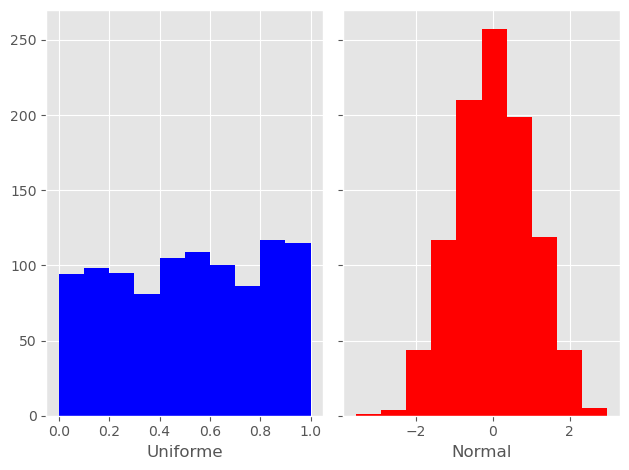

In [39]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(x1,color='blue',label='Uniforme')
axs[1].hist(x2,color='red',label='Normal')
axs[1].set_xlabel('Normal')
axs[0].set_xlabel('Uniforme')

5.1514348342607266e-17
1.0


(array([  4.,  16.,  73., 188., 267., 239., 148.,  53.,  10.,   2.]),
 array([-3.39786599, -2.69752732, -1.99718866, -1.29684999, -0.59651132,
         0.10382735,  0.80416601,  1.50450468,  2.20484335,  2.90518201,
         3.60552068]),
 <BarContainer object of 10 artists>)

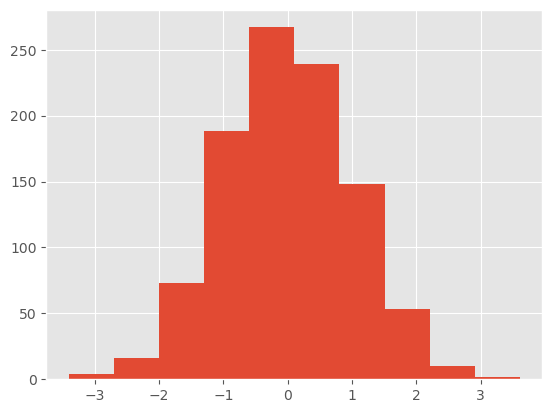

In [40]:
from scipy import stats
temprand = np.random.normal(14.2,4.7,size=1000)
zscores = stats.zscore(temprand)
print(np.mean(zscores))
print(np.std(zscores))
plt.hist(zscores)

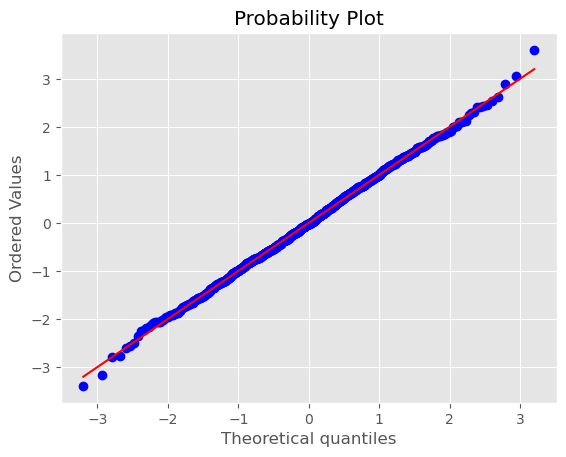

In [41]:
probplot = stats.probplot(zscores, plot=plt)


In [42]:
a30 = np.arange(start=0,stop=30,step=0.1)

In [43]:
a30pdf=stats.norm.pdf(a30,14.2,4.7)

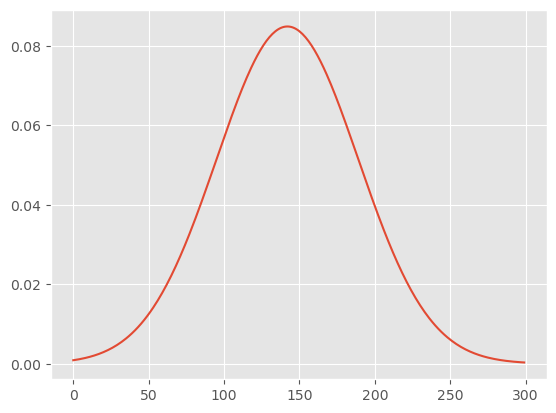

In [44]:
plt.plot(a30pdf)

2.842170943040401e-16
1.0


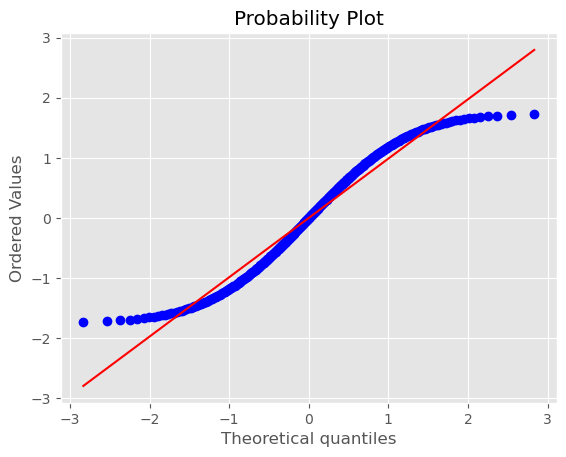

In [45]:
zscores = stats.zscore(a30)
print(np.mean(zscores))
print(np.std(zscores))
probplot = stats.probplot(zscores, plot=plt)


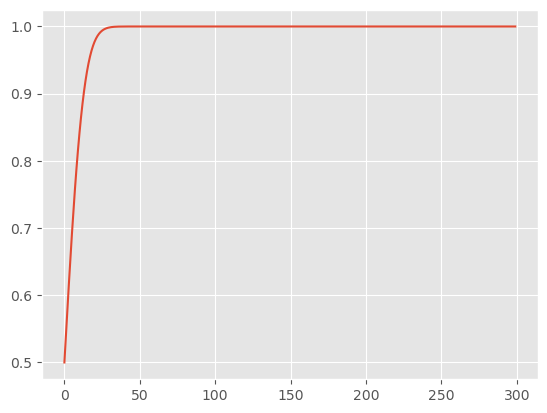

In [46]:
a30cdf=stats.norm.cdf(a30)
plt.plot(a30cdf)
#plt.xlim(20,39)

In [47]:
sm.lilliefors(a30,dist='norm')

(0.058487051889400954, 0.024181666381772493)